# "50 startups."

### _"Predict which companies to invest for maximizing profit" (Regression task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains data about 50 startups. It has 7 columns: “ID”, “R&D Spend”, “Administration”, “Marketing Spend”, “State”, “Category”  “Profit”.

    
**Метаданные:**
    
* **ID** - startup ID

* **R&D Spend** - how much each startup spends on Research and Development

* **Administration** - how much they spend on Administration cost

* **Marketing Spend** - how much they spend on Marketing

* **State** - which state the startup is based in

* **Category** - which business category the startup belong to

* **Profit** - the profit made by the startup
   

### Questions:
    

* #### Predict which companies to invest for maximizing profit (choose model with the best score; create predictions; choose companies)


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head
* ### Observation of target variable (describe + visualisation:distplot)
* ### Numerical and Categorical features
    * #### List of Numerical and Categorical features
* ### Missing Data
    * #### List of data features with missing values  
    * #### Filling missing values
* ### Numerical and Categorical features    
    * #### Visualisation  of Numerical and categorical features (regplot + barplot)

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### One-Hot Encoding 
* ### Standard Scaler (optional)
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### ML Models (Linear regression, Gradient Boosting Regression)
* ### Build, train, evaluate and visualise models
* ### Creating final predictions with Test set
* ### Model comparison


## [Conclusion](#Conclusion.)
* ### Submission of ‘.csv’ file with predictions

## Part 1: Import, Load Data.

* ### Import 

In [46]:
# import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab as plt
from scipy import stats

In [47]:
# import models and metrics
from sklearn import metrics, linear_model, model_selection
from sklearn.metrics import r2_score, mean_squared_error, mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

* ### Load Data

In [48]:
# read data from '.csv' files
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# identify target
target = train["Profit"]

## Part 2: Exploratory Data Analysis.

* ### Info

In [49]:
# print the full summary of the Train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   50 non-null     float64
 3   Marketing Spend  47 non-null     float64
 4   State            50 non-null     object 
 5   Category         49 non-null     object 
 6   Profit           50 non-null     float64
dtypes: float64(4), int64(1), object(2)
memory usage: 2.9+ KB


In [50]:
# print the full summary of the Test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               50 non-null     int64  
 1   R&D Spend        48 non-null     float64
 2   Administration   48 non-null     float64
 3   Marketing Spend  50 non-null     float64
 4   State            49 non-null     object 
 5   Category         50 non-null     object 
dtypes: float64(3), int64(1), object(2)
memory usage: 2.5+ KB


* ### Head

In [101]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0


In [102]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0


* ### Observation of target variable

In [53]:
# target variable
target.describe()

count        50.000000
mean     112012.639200
std       40306.180338
min       14681.400000
25%       90138.902500
50%      107978.190000
75%      139765.977500
max      192261.830000
Name: Profit, dtype: float64

C:\Users\kintal\AppData\Local\Temp\ipykernel_11992\2977215796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(target, color='g')


<AxesSubplot: xlabel='Profit', ylabel='Density'>

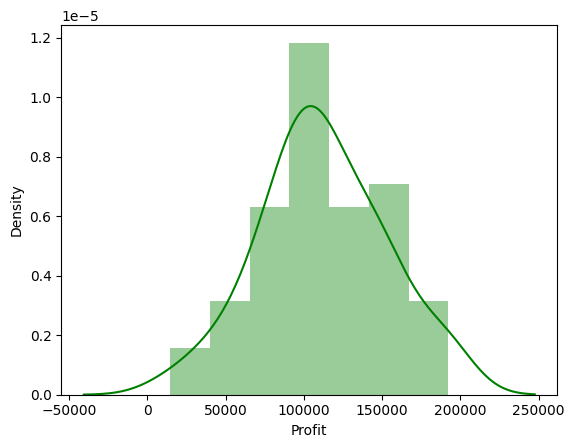

In [54]:
# visualisation of 'Profit' distribution
sns.distplot(target, color='g')

In [55]:
# set 'ID' to index
train = train.set_index('ID')
test = test.set_index('ID')

* ### Numerical and Categorical features
#### List of Numerical and Categorical features

In [56]:
# check for Numerical and Categorical features in Train
num_attrs_train = train.dtypes[train.dtypes != 'object'].index
print('Qty of Numerical attributes (features): ', len(num_attrs_train))
print()
print(train[num_attrs_train].columns)
print()
cat_attrs_train = train.dtypes[train.dtypes == 'object'].index
print('Qty of Categorical attributes (features): ', len(cat_attrs_train))
print()
print(train[cat_attrs_train].columns)

Qty of Numerical attributes (features):  4

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')

Qty of Categorical attributes (features):  2

Index(['State', 'Category'], dtype='object')


* ### Missing values

#### List of data features with missing values

In [57]:
# check the Train features with missing values 
nan_columns = [i for i in train.columns if train[i].isnull().any()]
print(train.isnull().sum())
print()
print(f'There are {len(nan_columns)} columns with NAN values for all rows.')
nan_columns

R&D Spend          2
Administration     0
Marketing Spend    3
State              0
Category           1
Profit             0
dtype: int64

There are 3 columns with NAN values for all rows.


['R&D Spend', 'Marketing Spend', 'Category']

In [58]:
# check the Test features with missing values
nan_columns = [i for i in test.columns if test[i].isnull().any()]
print(test.isnull().sum())
print()
print(f'There are {len(nan_columns)} columns with NAN values for all rows.')
nan_columns

R&D Spend          2
Administration     2
Marketing Spend    0
State              1
Category           0
dtype: int64

There are 3 columns with NAN values for all rows.


['R&D Spend', 'Administration', 'State']

#### Filling missing values

Fields where NAN values have meaning.

Explaining in further depth:

* 'R&D Spend': Numerical - replacement of NAN by 'mean';
* 'Administration': Numerical - replacement of NAN by 'mean';
* 'Marketing Spend': Numerical - replacement of NAN by 'mean';
* 'State': Categorical - replacement of NAN by 'None';
* 'Category': Categorical - replacement of NAN by 'None'.

In [59]:
# Numerical NAN columns to fill in Train and Test datasets
num_nan_columns_fill = [
    'R&D Spend',
    'Administration',
    'Marketing Spend'
]

# replace 'NAN' with 'mean' in these columns
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

# Categorical NAN columns to fill in Train and Test datasets
cat_nan_columns_fill = [
    'State',
    'Category'
]

# replace 'NAN' with 'None' in these columns
for col in cat_nan_columns_fill:
    train.fillna('None', inplace=True)
    test.fillna('None', inplace=True)

train.info()
train.head(50)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Category         50 non-null     object 
 5   Profit           50 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.7+ KB


C:\Users\kintal\AppData\Local\Temp\ipykernel_11992\2974067905.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.fillna(train.mean(), inplace=True)
C:\Users\kintal\AppData\Local\Temp\ipykernel_11992\2974067905.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test.fillna(test.mean(), inplace=True)


,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.200000,136897.80,471784.100000,New York,Industrials,192261.83
1,162597.700000,151377.59,443898.530000,California,Technology,191792.06
2,153441.510000,101145.55,407934.540000,Florida,Healthcare,191050.39
3,144372.410000,118671.85,383199.620000,New York,Financials,182901.99
4,142107.340000,91391.77,366168.420000,Florida,Industrials,166187.94
5,131876.900000,99814.71,362861.360000,New York,Telecommunications,156991.12
6,134615.460000,147198.87,127716.820000,California,Telecommunications,156122.51
7,130298.130000,145530.06,323876.680000,Florida,Technology,155752.60
8,120542.520000,148718.95,311613.290000,New York,Healthcare,152211.77


In [60]:
# check is there any mising values left in Train
train.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Category           0
Profit             0
dtype: int64

In [61]:
# check is there any mising values left in Test
test.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Category           0
dtype: int64

#### Visualisation  of Numerical features (regplot)

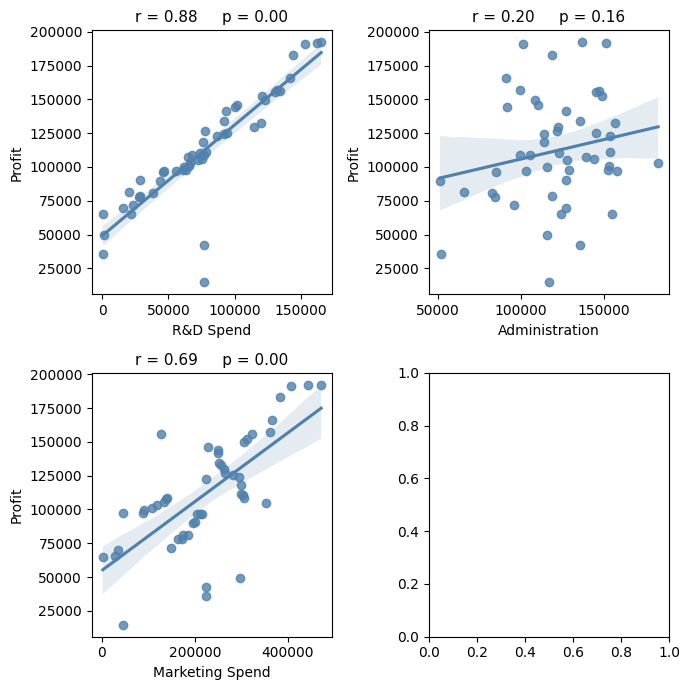

In [62]:
# numerical features visualisation
nr_rows = 2
nr_cols = 2

fig, axs = plt.subplots(nr_rows, nr_cols, figsize=(nr_cols*3.5, nr_rows * 3.5))

num_feats = list(num_attrs_train)
not_plot = ['Id', 'Profit']
plot_num_feats = [c for c in list(num_attrs_train) if c not in not_plot]

for r in range(0, nr_rows):
    for c in range(0, nr_cols):
        i = r * nr_cols + c
        if i < len(plot_num_feats):
            sns.regplot(x=train[plot_num_feats[i]], y=train['Profit'], ax=axs[r][c], color='#5081ac')
            stp = stats.pearsonr(train[plot_num_feats[i]], train['Profit'])
            
            str_title = f'r = {stp[0]:.2f}     p = {stp[1]:.2f}'
            axs[r][c].set_title(str_title, fontsize=11)
            
plt.tight_layout()
plt.show()

<AxesSubplot: xlabel='State', ylabel='Profit'>

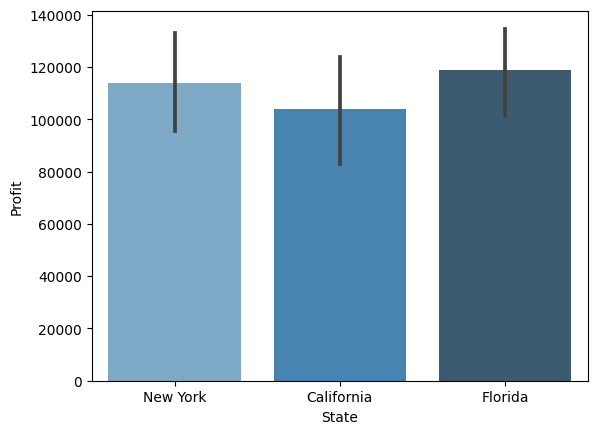

In [63]:
# categorical features visualisation
# 'Profit' split in 'State' level
sns.barplot(x='State', y='Profit', data=train, palette='Blues_d')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Industrials'),
  Text(1, 0, 'Technology'),
  Text(2, 0, 'Healthcare'),
  Text(3, 0, 'Financials'),
  Text(4, 0, 'Telecommunications'),
  Text(5, 0, 'None'),
  Text(6, 0, 'Oil & Gas')])

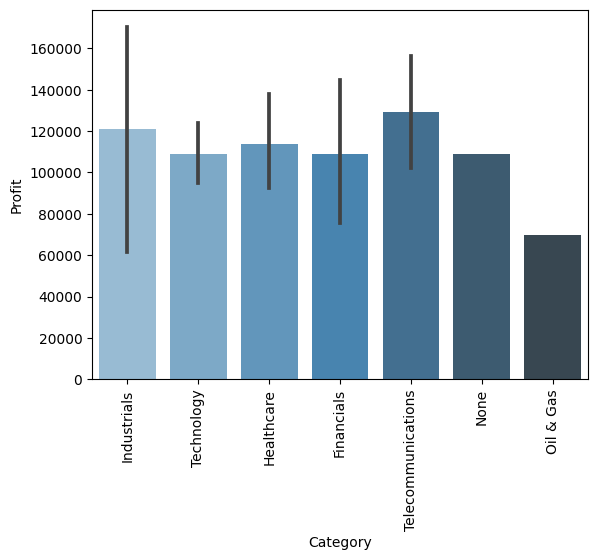

In [64]:
# categorical features visualisation
# 'Profit' split in 'Category' level
sns.barplot(x='Category', y='Profit', data=train, palette='Blues_d')
plt.xticks(rotation=90)

## Part 3: Data Wrangling and Transformation.

* ### One-Hot Encoding

In [65]:
train.head()

,R&D Spend,Administration,Marketing Spend,State,Category,Profit
ID,,,,,,
0,165349.20,136897.80,471784.10,New York,Industrials,192261.83
1,162597.70,151377.59,443898.53,California,Technology,191792.06
2,153441.51,101145.55,407934.54,Florida,Healthcare,191050.39
3,144372.41,118671.85,383199.62,New York,Financials,182901.99
4,142107.34,91391.77,366168.42,Florida,Industrials,166187.94


In [66]:
# One-Hot Encoding Train dataset (only for categorical data)
train = pd.get_dummies(train, columns=['State', 'Category'])

# Drop target variable 
train = train.drop(columns=['Profit'])

In [67]:
# preview of the first 5 lines of the loaded Train data 
train.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,Category_Financials,Category_Healthcare,Category_Industrials,Category_None,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,1,0,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,1,0,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,1,0,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,1,0,0,0,0


In [68]:
# Train data shape
train.shape

(50, 13)

In [69]:
# One Hot-Encoding Test dataset
test = pd.get_dummies(test, columns=['State', 'Category'])

In [70]:
# preview of the first 5 lines of the loaded Test data 
test.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York,State_None,Category_Financials,Category_Healthcare,Category_Industrials,Category_Oil & Gas,Category_Technology,Category_Telecommunications
ID,,,,,,,,,,,,,
0,165349.20,136897.80,471784.10,0,0,1,0,0,0,1,0,0,0
1,162597.70,151377.59,443898.53,1,0,0,0,0,0,0,0,1,0
2,153441.51,101145.55,407934.54,0,1,0,0,0,1,0,0,0,0
3,144372.41,118671.85,383199.62,0,0,1,0,1,0,0,0,0,0
4,142107.34,91391.77,366168.42,0,1,0,0,0,0,1,0,0,0


In [71]:
# Test data shape
test.shape

(50, 13)

In [72]:
# Drop unnecessary variables 
# We don't have Category_None in test, do we need to delete this column
train = train.drop(columns=['Category_None'])
# The same for test and State None
test = test.drop(columns=['State_None'])

* ### StandardScaler

In [73]:
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# sc_train = sc.fit_transform(train)
# sc_test = sc.fit_transform(test)

In [74]:
# sc_train = pd.DataFrame(sc_train)
# sc_train.head()

In [75]:
# sc_test = pd.DataFrame(sc_test)
# sc_test.head()

* ### Creating datasets for ML part

In [76]:
# If we use scaler
# set 'X' for features of scaled Train dataset 'sc_train'
# X = sc_train

# set 'y' for the target 'Profit'
# y = target

# 'X_Test' for features of scaled Test dataset 'sc_test'
# X_Test = sc_test

In [77]:
# If we don't use scaler
# set 'X' for features of scaled Train dataset 'train'
X = train

# set 'y' for the target 'Profit'
# raw target, cause we dropped it during one-hot encoding
y = target

# 'X_Test' for features of scaled Test dataset 'test'
X_Test = test

* ### 'Train\Test' split

In [78]:
# X_test - splitted train dataset for validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [79]:
X_train.shape

(35, 12)

In [80]:
X_test.shape

(15, 12)

## Part 4: Machine Learning.

* ### Build, train, evaluate and visualise models

* #### Linear Regression

In [81]:
# Linear Regression model
LR = LinearRegression()

# Model Training
LR.fit(X_train, y_train)

# Model Prediction
LR_pred = LR.predict(X_test)
LR_pred

array([ 98805.75002446, 120582.06246646, 137745.21283983,  79034.09403155,
       188946.03574103, 118622.88055624,  72254.79066   ,  67164.69815167,
       128666.63674181, 142782.3087556 ,  91593.10175464,  80612.80343627,
       101576.44119369, 101521.36354767, 125192.09524706])

In [82]:
# Model R2 score. Closer to 1 is better (> 0.86 at least)
LRScore = LR.score(X_test, y_test)
LRScore

0.7896875328347083

In [83]:
# Model Metrics
LRMetrics = pd.DataFrame({
    'Model': 'Linear Regression',
    'r2score': r2_score(y_test, LR_pred),
    'MAE': metrics.mean_absolute_error(y_test, LR_pred),
    'MSE': metrics.mean_squared_error(y_test, LR_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, LR_pred)),
    'MSLE': metrics.mean_squared_log_error(y_test, LR_pred),
    'RMSLE': np.sqrt(metrics.mean_squared_log_error(y_test, LR_pred))
}, index=[1])
LRMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.789688,11029.42834,2.030035e+08,14247.930908,0.019417,0.139346


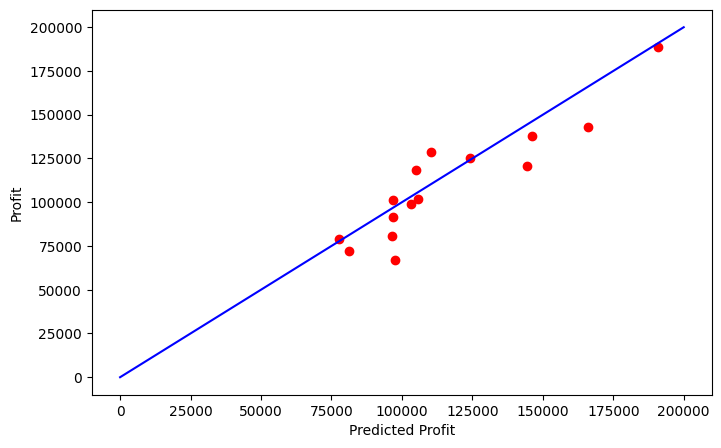

In [84]:
# visualisation of Train dataset predictions

# Plot outputs
plt.figure(figsize=(8, 5))
plt.plot(y_test, LR_pred, 'ro')
plt.plot([0, 200000], [0, 200000], 'b-')
plt.xlabel('Predicted Profit')
plt.ylabel('Profit')
plt.show()

# only 2 point on line - so only 2 points were well predicted, it's a bad result

In [85]:
# Test final predictions
LR_pred1 = LR.predict(X_Test)
LR_pred1

array([173426.18101741, 189136.03555658, 188946.03574103, 172036.55217563,
       142782.3087556 , 167404.74613989, 149507.66869685, 157587.3922617 ,
       161999.46205811, 156553.51538032, 139352.35038226, 120582.06246646,
       123602.43674921, 100870.47894581, 145214.20798084, 136337.33249719,
       115045.39296363, 128341.08289509, 125192.09524706, 120516.13649408,
       112463.0053601 , 124542.37179041, 128666.63674181, 109208.23838339,
       109268.13666644, 103605.55516326, 101576.44119369, 118622.88055624,
        97349.61154671,  96055.59746149,  97834.88695235,  67164.69815167,
        79791.40130303,  91593.10175464, 101521.36354767,  80612.80343627,
        75658.16264028,  81945.35628307,  72254.79066   ,  74848.96219321,
        87297.82122284,  79034.09403155,  73120.64657189,  69758.98      ,
        54155.9502917 ,  48109.28237089,  70180.21341563, 102747.18569225,
        34091.10390916,  66953.92003678])

In [86]:
# Model Metrics
LRMetrics1 = pd.DataFrame({
    'Model': 'Linear Regression',
    'r2score': r2_score(y, LR_pred1),
    'MAE': metrics.mean_absolute_error(y, LR_pred1),
    'MSE': metrics.mean_squared_error(y, LR_pred1),
    'RMSE': np.sqrt(metrics.mean_squared_error(y, LR_pred1)),
    'MSLE': metrics.mean_squared_log_error(y, LR_pred1),
    'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, LR_pred1))
}, index=[1])
LRMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.48225,2.756271e+08,16602.021239,0.077744,0.278826


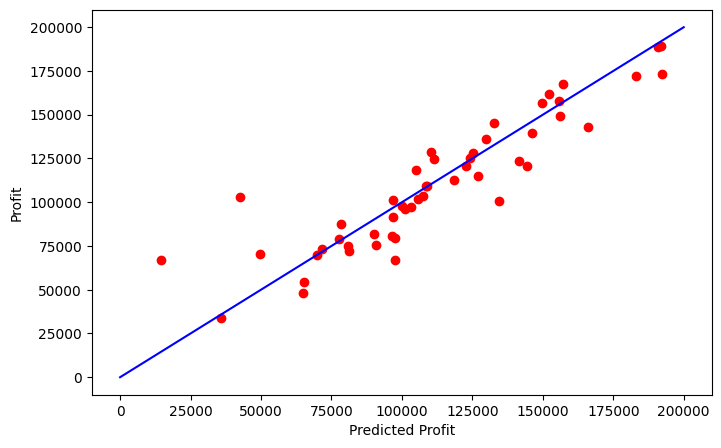

In [87]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8, 5))
plt.plot(y, LR_pred1, 'ro')
plt.plot([0, 200000], [0, 200000], 'b-')
plt.xlabel('Predicted Profit')
plt.ylabel('Profit')
plt.show()

In [88]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actual_vs_predicted = pd.DataFrame({'Actual Profit': y, 'LR Predicted Profit': LR_pred1})
actual_vs_predicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit
0,192261.830000,173426.181017
1,191792.060000,189136.035557
2,191050.390000,188946.035741
3,182901.990000,172036.552176
4,166187.940000,142782.308756
5,156991.120000,167404.746140
6,156122.510000,149507.668697
7,155752.600000,157587.392262
8,152211.770000,161999.462058
9,149759.960000,156553.515380


* #### Gradient Boosting Regressor

In [90]:
# Gradient Boosting Regressor model
GB = GradientBoostingRegressor(random_state=0)

# Model Training
GB.fit(X_train, y_train) 

# Model Prediction
GB_pred = GB.predict(X_test)

# Model R2 score
GBscore = GB.score(X_test, y_test)

In [92]:
# Model Metrics
GBMetrics = pd.DataFrame({
    'Model': 'Gradient Boosting Regressor',
    'r2score': r2_score(y_test, GB_pred),
    'MAE': metrics.mean_absolute_error(y_test, GB_pred),
    'MSE': metrics.mean_squared_error(y_test, GB_pred),
    'RMSE': np.sqrt(metrics.mean_squared_error(y_test, GB_pred)),
    'MSLE': metrics.mean_squared_log_error(y_test, GB_pred),
    'RMSLE': np.sqrt(metrics.mean_squared_log_error(y_test, GB_pred))
}, index=[1])
GBMetrics

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Gradient Boosting Regressor,0.871975,8794.067752,1.235755e+08,11116.451707,0.015324,0.123789


In [93]:
# Test final predictions
GB_pred1 = GB.predict(X_Test)

In [95]:
# Model Metrics
GBMetrics1 = pd.DataFrame({
    'Model': 'Gradient Boosting Regressor',
    'r2score': r2_score(y, GB_pred1),
    'MAE': metrics.mean_absolute_error(y, GB_pred1),
    'MSE': metrics.mean_squared_error(y, GB_pred1),
    'RMSE': np.sqrt(metrics.mean_squared_error(y, GB_pred1)),
    'MSLE': metrics.mean_squared_log_error(y, GB_pred1),
    'RMSLE': np.sqrt(metrics.mean_squared_log_error(y, GB_pred1))
}, index=[1])
GBMetrics1

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Gradient Boosting Regressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


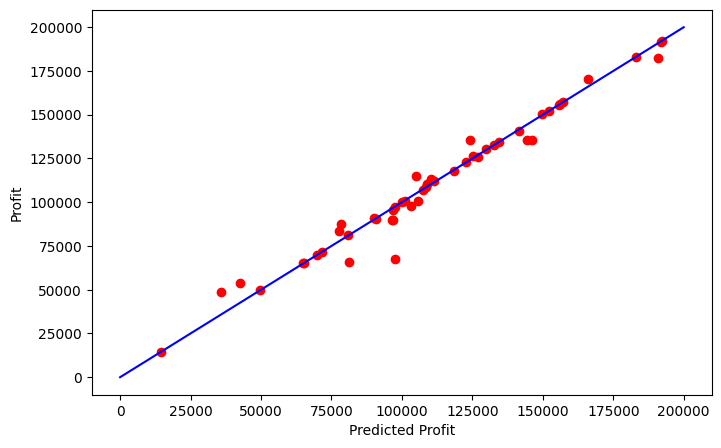

In [96]:
# visualisation of Test dataset predictions

# Plot outputs
plt.figure(figsize=(8, 5))
plt.plot(y, GB_pred1, 'ro')
plt.plot([0, 200000], [0, 200000], 'b-')
plt.xlabel('Predicted Profit')
plt.ylabel('Profit')
plt.show()

### Model comparison

In [97]:
# score comparison of models
frames = [LRMetrics1, GBMetrics1]
training_result = pd.concat(frames)
training_result

,Model,r2score,MAE,MSE,RMSE,MSLE,RMSLE
1,Linear Regression,0.826878,11442.482250,2.756271e+08,16602.021239,0.077744,0.278826
1,Gradient Boosting Regressor,0.972002,3554.613741,4.457490e+07,6676.443468,0.007986,0.089364


In [98]:
# comparison between Actual 'Profit' from Train dataset abd Predicted 'Profit' from Test dataset
actual_vs_predicted = pd.DataFrame({'Actual Profit': y, 'LR Predicted Profit': LR_pred1, 'GB Predicted Profit': GB_pred1})
actual_vs_predicted.head(10).style.background_gradient(cmap='Blues')

,Actual Profit,LR Predicted Profit,GB Predicted Profit
0,192261.830000,173426.181017,191867.624129
1,191792.060000,189136.035557,191631.052384
2,191050.390000,188946.035741,182312.330201
3,182901.990000,172036.552176,182851.070198
4,166187.940000,142782.308756,170184.031177
5,156991.120000,167404.746140,156991.181748
6,156122.510000,149507.668697,156065.183378
7,155752.600000,157587.392262,155657.315655
8,152211.770000,161999.462058,152090.773106
9,149759.960000,156553.515380,150395.829435


**Result**: The best model is **Gradient Boosting Regressor** with **R2 score = 0.972002**.

##  Conclusion.

In [103]:
# submission of .csv file with final predictions
sub = pd.DataFrame()
sub['ID'] = test.index
sub['Profit'] = GB_pred1
sub.to_csv('StartupPredictions.csv', index=False)